# EDA

## 1.0 Importing packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from collections import defaultdict

from PIL import Image

import skimage.io as io
from skimage.feature import hog
from skimage import data, exposure

In [2]:
df = pd.read_csv('/Users/chinmayasukumar/Documents/Springboard/Capstone-3_Classifying_Steel_Defects/data/interim/data.csv',\
                index_col=False)

In [3]:
df.head()

,Filename,Type,Number
0,Cr_1.bmp,Crazing,1
1,Cr_10.bmp,Crazing,10
2,Cr_100.bmp,Crazing,100
3,Cr_101.bmp,Crazing,101
4,Cr_102.bmp,Crazing,102


In [4]:
# Checking colour mode
gen_path = '/Users/chinmayasukumar/Documents/Springboard/Capstone-3_Classifying_Steel_Defects/data/raw/'

# Creating dictionary to gather image modes
counter = defaultdict(int)

# Getting all image paths by looping through the 300 images in each 6 folders
for i in range(0, 300):
    # General path + folder + filename in the DataFrame in the 0th column
    image_paths = [gen_path + 'Crazing/' + df[df['Type'] == 'Crazing'].iloc[i,0],
               gen_path + 'Inclusions/' + df[df['Type'] == 'Inclusions'].iloc[i,0], 
               gen_path + 'Pitted/' + df[df['Type'] == 'Pitted'].iloc[i,0],
               gen_path + 'Scratches/' + df[df['Type'] == 'Scratches'].iloc[i,0],
               gen_path + 'Rolled/' + df[df['Type'] == 'Rolled'].iloc[i,0],
               gen_path + 'Patches/' + df[df['Type'] == 'Patches'].iloc[i,0]]
    
    # Extracting image modes and saving to counter dict
    for path in image_paths:
        img = Image.open(path)
        counter[img.mode] += 1
            
print(counter)

defaultdict(<class 'int'>, {'L': 1800})


### All images are grayscale which is perfect

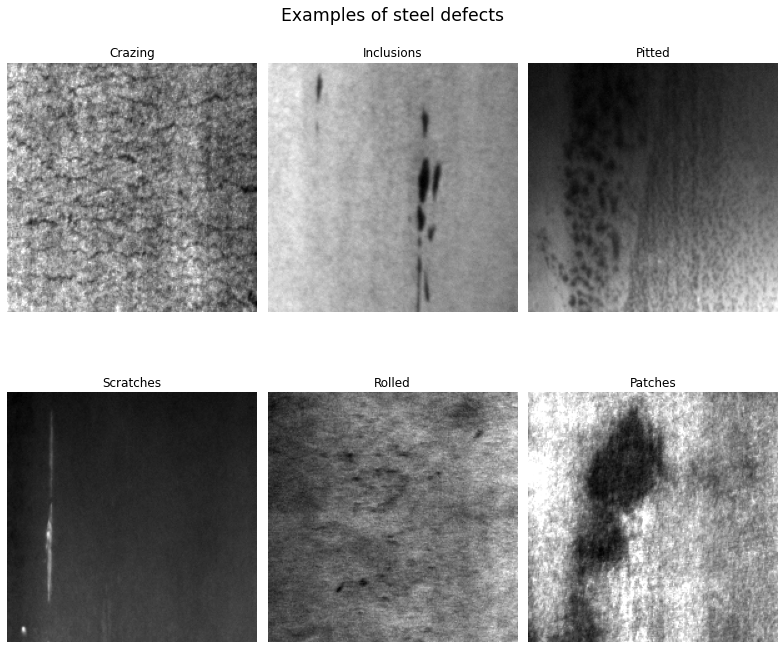

In [5]:
# Collecting first image of each defect type to display
image_paths = [gen_path + 'Crazing/' + df[df['Type'] == 'Crazing'].iloc[0,0],
               gen_path + 'Inclusions/' + df[df['Type'] == 'Inclusions'].iloc[0,0], 
               gen_path + 'Pitted/' + df[df['Type'] == 'Pitted'].iloc[0,0],
               gen_path + 'Scratches/' + df[df['Type'] == 'Scratches'].iloc[0,0],
               gen_path + 'Rolled/' + df[df['Type'] == 'Rolled'].iloc[0,0],
               gen_path + 'Patches/' + df[df['Type'] == 'Patches'].iloc[0,0]]

# Creating 2x3 plot
fig, ax = plt.subplots(2, 3, figsize=(11,10))

for i, image_path in enumerate(image_paths):
    img = mpimg.imread(image_path)
    row = i//3
    col = i%3
    ax[row,col].imshow(img, cmap='gray')
    ax[row,col].axis('off')
    
    ax[0,0].set_title('Crazing')
    ax[0,1].set_title('Inclusions')
    ax[0,2].set_title('Pitted')
    ax[1,0].set_title('Scratches')
    ax[1,1].set_title('Rolled')
    ax[1,2].set_title('Patches')
    
plt.tight_layout()

plt.suptitle('Examples of steel defects', size='xx-large')

plt.show()